environments used:
    - phyluce
    - kraken
    - pathogen_notebook
    - jupyterlab
    - <anything to build probeset>
    - <phylogeny>

# Prep the environment and get sample info

In [5]:
1-(0.5*0.5*0.5*0.5*0.5*0.5*0.5*0.5*0.5*0.5)

0.9990234375

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ete3 import NCBITaxa
from tqdm.notebook import tqdm
from Bio import SeqIO
import re
import gzip

/master/nplatt/anaconda3/envs/pathogen_notebook/lib/python3.10/site-packages/ete3-3.1.2-py3.7.egg/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
/master/nplatt/anaconda3/envs/pathogen_notebook/lib/python3.10/site-packages/ete3-3.1.2-py3.7.egg/ete3/evol/parser/codemlparser.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?


In [639]:
proj_dir="/master/nplatt/pathogen_probes/"
os.chdir(proj_dir)

In [640]:
os.chdir("{}/results/seq_analyses".format(proj_dir))

In [4]:
samples_df=pd.read_csv("sample_info.csv")
samples_df

,admera_id,sample_name,i7_seq,i7_name,i5_seq,i5_name,genus,species,location,collection_date,seq_exp_id,r1_md5sum,r2_md5sum,sra,notes
0,c1e-3p_control_enrich,c1e_3p_control_enrich,ATTCAGAA,i7_50,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-1e-3p-exp3_S7
1,c1p_control_enrich,c1p_control_enrich,CGGCTATG,i7_49,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-01p-exp3_S4
2,c1p_control_no_enrich,c1p_control_no_enrich,CTGAAGCT,i7_48,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 0x-0c-01p-exp3_S1
3,19047FL-44Q2-01-35,tk101275,CCGTAAGA,i7_35,AGAGTCCA,i5_35,Glossophaga,commissarisi,Honduras,7/10/2001,19047-44Q2,na,na,na,na
4,19047FL-44Q2-01-28,tk136205,ACCACGAT,i7_28,GTCTGCAA,i5_28,Heteromys,desmarestianus,Honduras,7/16/2004,19047-44Q2,na,na,na,na
5,19047FL-44Q2-01-18,tk136222,CGGTTGTT,i7_18,GTGGTATG,i5_18,Peromyscus,mexicanus,Honduras,7/17/2004,19047-44Q2,na,na,na,na
6,19047FL-44Q2-01-22,tk136228,CGTGTGTA,i7_22,CCAACGAA,i5_22,Heteromys,desmarestianus,Honduras,7/17/2004,19047-44Q2,na,na,na,na
7,19047FL-44Q2-01-37,tk136240,GAGACGAT,i7_37,ACCGGTTA,i5_37,Glossophaga,soricina,Honduras,7/16/2004,19047-44Q2,na,na,na,na
8,19047FL-44Q2-01-29,tk136756,ATGCCTGT,i7_29,AGATTGCG,i5_29,Eptesicus,furinalis,Honduras,7/17/2004,19047-44Q2,na,na,na,na
9,19047FL-44Q2-01-15,tk136783,AACTGAGC,i7_15,CAATCAGG,i5_15,Glossophaga,leachii,Honduras,7/17/2004,19047-44Q2,na,na,na,na


# Clean up the raw reads

In [21]:
%%bash
cat confs/illumiprocessor.conf

[adapters] 
i7:GATCGGAAGAGCACACGTCTGAACTCCAGTCAC*ATCTCGTATGCCGTCTTCTGCTTG
i5:AATGATACGGCGACCACCGAGATCTACAC*ACACTCTTTCCCTACACGACGCTCTTCCGATCT

[tag sequences]
i7_1:CTGATCGT
i7_2:CGGCTAAT
i7_3:GACGATCT
i7_4:CCTTGATC
i7_5:GTGAAGTG
i7_6:GTTGTTCG
i7_7:GAGCAGTA
i7_8:ATGACGTC
i7_9:CGCTCTAT
i7_10:GTTGACCT
i7_11:CGACGTTA
i7_12:GTTCTCGT
i7_13:ACTCTCGA
i7_14:ATCGATCG
i7_15:AACTGAGC
i7_16:GTCGAAGA
i7_17:CATGGCTA
i7_18:CGGTTGTT
i7_19:AGTTCGTC
i7_20:TTGGACGT
i7_21:TATCGGTC
i7_22:CGTGTGTA
i7_23:TACGCCTT
i7_24:TCAGGCTT
i7_25:TGAGCTAG
i7_26:GCAAGATC
i7_27:CTTAGGAC
i7_28:ACCACGAT
i7_29:ATGCCTGT
i7_30:ACTGAGGT
i7_31:TTGCGAAG
i7_32:AGTGGATC
i7_33:AACGTCTG
i7_34:ACGACTTG
i7_35:CCGTAAGA
i7_36:CCTTGTAG
i7_37:GAGACGAT
i7_38:GCTATCCT
i7_39:GTGCCATA
i7_40:GATTACCG
i7_41:CAACACCT
i7_42:TGAAGACG
i7_43:ATCGCCAT
i7_44:GATAGGCT
i7_45:ACGTTCAG
i7_46:CACTAGCT
i7_47:ATCACACG
i7_48:CTGAAGCT
i7_49:CGGCTATG
i7_50:ATTCAGAA
i5_1:GCGCATAT
i5_2:CTCGTTCT
i5_3:TCGTGCAT
i5_4:GATGGAGT
i5_5:GAGCAATC
i5_6:CCAACTTC
i5_7:TGAGCTGT
i5_

In [ ]:
%%bash

#clean up raw reads
illumiprocessor \
    --input raw-fastq/ \
    --output 01_clean-fastq \
    --config confs/illumiprocessor.conf \
    --cores 64 \
    --log-path logs/

In [27]:
samples_df["num_raw_pe_reads"]=0

#count number of clean and processed reads per sample
for sample in samples_df["admera_id"]:
    
    #count raw
    r1_raw_fq=glob.glob("../../data/seq_data/19047-44Q2/{}*R1*.fastq.gz".format(sample))[0]
    r2_raw_fq=glob.glob("../../data/seq_data/19047-44Q2/{}*R2*.fastq.gz".format(sample))[0]
    
    with gzip.open(r1_raw_fq, "rt") as r1_raw_fq_handle:
        
        num_reads=0
        for seq_record in SeqIO.parse(r1_raw_fq_handle, "fastq"):
            num_reads+=1

        samples_df.loc[samples_df["admera_id"] ==  sample, "num_raw_reads"] = num_reads

In [64]:
samples_df.to_csv("sample_info.csv", sep=',', index=False, header=True)
samples_df

,admera_id,sample_name,i7_seq,i7_name,i5_seq,i5_name,genus,species,location,collection_date,seq_exp_id,r1_md5sum,r2_md5sum,sra,notes,num_raw_pe_reads,num_cleaned_pe_reads,num_cleaned_se_reads
0,c1e-3p_control_enrich,c1e_3p_control_enrich,ATTCAGAA,i7_50,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-1e-3p-exp3_S7,1107686.0,509672.0,38204
1,c1p_control_enrich,c1p_control_enrich,CGGCTATG,i7_49,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-01p-exp3_S4,856976.0,398469.0,26015
2,c1p_control_no_enrich,c1p_control_no_enrich,CTGAAGCT,i7_48,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 0x-0c-01p-exp3_S1,801294.0,375786.0,21421
3,19047FL-44Q2-01-35,tk101275,CCGTAAGA,i7_35,AGAGTCCA,i5_35,Glossophaga,commissarisi,Honduras,7/10/2001,19047-44Q2,na,na,na,na,664496.0,322934.0,8985
4,19047FL-44Q2-01-28,tk136205,ACCACGAT,i7_28,GTCTGCAA,i5_28,Heteromys,desmarestianus,Honduras,7/16/2004,19047-44Q2,na,na,na,na,5758266.0,2771913.0,103535
5,19047FL-44Q2-01-18,tk136222,CGGTTGTT,i7_18,GTGGTATG,i5_18,Peromyscus,mexicanus,Honduras,7/17/2004,19047-44Q2,na,na,na,na,19101828.0,9081704.0,459368
6,19047FL-44Q2-01-22,tk136228,CGTGTGTA,i7_22,CCAACGAA,i5_22,Heteromys,desmarestianus,Honduras,7/17/2004,19047-44Q2,na,na,na,na,11894608.0,5623233.0,314150
7,19047FL-44Q2-01-37,tk136240,GAGACGAT,i7_37,ACCGGTTA,i5_37,Glossophaga,soricina,Honduras,7/16/2004,19047-44Q2,na,na,na,na,9946260.0,4842825.0,126578
8,19047FL-44Q2-01-29,tk136756,ATGCCTGT,i7_29,AGATTGCG,i5_29,Eptesicus,furinalis,Honduras,7/17/2004,19047-44Q2,na,na,na,na,8535164.0,4061262.0,200157
9,19047FL-44Q2-01-15,tk136783,AACTGAGC,i7_15,CAATCAGG,i5_15,Glossophaga,leachii,Honduras,7/17/2004,19047-44Q2,na,na,na,na,24792402.0,11763488.0,611935


In [66]:
np.sum(samples_df["num_raw_pe_reads"][0:3])/1000000

2.765956

In [68]:
np.mean(samples_df["num_raw_pe_reads"][3:])/1000000

649.26966

In [42]:
samples_df["num_cleaned_pe_reads"]=0
samples_df["num_cleaned_se_reads"]=0

#count number of clean and processed reads per sample
for sample in samples_df["sample_name"]:

    #count clean paired
    r1_clean_fq=glob.glob("01_clean-fastq/{}/split-adapter-quality-trimmed/{}-READ1.fastq.gz".format(sample, sample))[0]
    r2_clean_fq=glob.glob("01_clean-fastq/{}/split-adapter-quality-trimmed/{}-READ2.fastq.gz".format(sample, sample))[0]
    rx_clean_fq=glob.glob("01_clean-fastq/{}/split-adapter-quality-trimmed/{}-READ-singleton.fastq.gz".format(sample, sample))[0]


    with gzip.open(r1_clean_fq, "rt") as r1_clean_fq_handle:
        
        num_reads=0
        for seq_record in SeqIO.parse(r1_clean_fq_handle, "fastq"):
            num_reads+=1

        samples_df.loc[samples_df["sample_name"] ==  sample, "num_cleaned_pe_reads"] = num_reads

    #count clean single
    with gzip.open(rx_clean_fq, "rt") as rx_clean_fq_handle:
        
        num_reads=0
        for seq_record in SeqIO.parse(rx_clean_fq_handle, "fastq"):
            num_reads+=1

        samples_df.loc[samples_df["sample_name"] ==  sample, "num_cleaned_se_reads"] = num_reads

In [63]:
df.to_csv("all_samples_report.csv", sep=',', index=False, header=True)

,admera_id,sample_name,i7_seq,i7_name,i5_seq,i5_name,genus,species,location,collection_date,seq_exp_id,r1_md5sum,r2_md5sum,sra,notes,num_raw_pe_reads,num_cleaned_pe_reads,num_cleaned_se_reads
0,c1e-3p_control_enrich,c1e_3p_control_enrich,ATTCAGAA,i7_50,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-1e-3p-exp3_S7,1107686.0,509672.0,38204
1,c1p_control_enrich,c1p_control_enrich,CGGCTATG,i7_49,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-01p-exp3_S4,856976.0,398469.0,26015
2,c1p_control_no_enrich,c1p_control_no_enrich,CTGAAGCT,i7_48,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 0x-0c-01p-exp3_S1,801294.0,375786.0,21421
3,19047FL-44Q2-01-35,tk101275,CCGTAAGA,i7_35,AGAGTCCA,i5_35,Glossophaga,commissarisi,Honduras,7/10/2001,19047-44Q2,na,na,na,na,664496.0,322934.0,8985
4,19047FL-44Q2-01-28,tk136205,ACCACGAT,i7_28,GTCTGCAA,i5_28,Heteromys,desmarestianus,Honduras,7/16/2004,19047-44Q2,na,na,na,na,5758266.0,2771913.0,103535
5,19047FL-44Q2-01-18,tk136222,CGGTTGTT,i7_18,GTGGTATG,i5_18,Peromyscus,mexicanus,Honduras,7/17/2004,19047-44Q2,na,na,na,na,19101828.0,9081704.0,459368
6,19047FL-44Q2-01-22,tk136228,CGTGTGTA,i7_22,CCAACGAA,i5_22,Heteromys,desmarestianus,Honduras,7/17/2004,19047-44Q2,na,na,na,na,11894608.0,5623233.0,314150
7,19047FL-44Q2-01-37,tk136240,GAGACGAT,i7_37,ACCGGTTA,i5_37,Glossophaga,soricina,Honduras,7/16/2004,19047-44Q2,na,na,na,na,9946260.0,4842825.0,126578
8,19047FL-44Q2-01-29,tk136756,ATGCCTGT,i7_29,AGATTGCG,i5_29,Eptesicus,furinalis,Honduras,7/17/2004,19047-44Q2,na,na,na,na,8535164.0,4061262.0,200157
9,19047FL-44Q2-01-15,tk136783,AACTGAGC,i7_15,CAATCAGG,i5_15,Glossophaga,leachii,Honduras,7/17/2004,19047-44Q2,na,na,na,na,24792402.0,11763488.0,611935


# Classify reads with Kraken2

In [641]:
#os.mkdir("02_kraken")
os.chdir("02_kraken")

## Build a custom Kraken2 database

This code is used to download representative genomes from all available RefSeq assemblies (v212).  Downstream we will use these genomes to map our probes and find all the regions that our probes could ***possibly*** bind.  We will extract those regions and create a database to map our reads from the wet-lab probe hybridizations.  Doing this is more memory effecient that just blindly mapping to all the RefSeq genomes (much faster as well).  

Download the genomes

In [ ]:
%%bash 

genome_updater.sh \
    -g "" \
    -d "refseq" \
    -c "representative genome" \
    -l "complete genome,chromosome" \
    -f "genomic.fna.gz,assembly_report.txt" \
    -o "refseq_212_fas" \
    -b "v1" \
    -a \
    -A species:1 \
    -m \
    -u \
    -r \
    -p \
    -t 24

#uncompress for kraken2
cd refseq_212_fas/v1/files

for GENOME in $(ls *.gz); do
    echo $GENOME
    gunzip -c $GENOME >$(basename $GENOME .gz)
done

cd ../../..

Use snakemake to map the probes against each RefSeq genome, extract the hits (plus flanking sequence), and then create a single fasta file `target_loci.fas` that contains these "targeted" sites.

In [ ]:
%%bash

#build a minimum kraken2 db

cd /master/nplatt/pathogen_probes/results/seq_analyses/min_probe_db/

snakemake \
    --use-conda \
    --printshellcmds \
    --cluster 'qsub -V -cwd -S /bin/bash -pe smp {threads} -o {log}.log -j y -q all.q' \
    --jobs 100 \
    --latency-wait 200 \
    --rerun-incomplete \
    --keep-going \
    --snake /master/nplatt/pathogen_probes/code/min_probe_db.snake.py

Now build the custom/minimal Kraken2 database.

In [ ]:
%%bash
cd /master/nplatt/pathogen_probes/results/seq_analyses/min_probe_db/

conda activate kraken

kraken2-build \
    --download-taxonomy \
    --threads 24 \
    --db probed_regions_k2db

kraken2-build \
    --add-to-library /master/nplatt/pathogen_probes/results/seq_analyses/min_probe_db/target_loci.fas \
    --db probed_regions_k2db

kraken2-build \
    --build \
    --threads 24 \
    --db probed_regions_k2db

## Classify reads against the Kraken2 database

In [ ]:
%%bash

O_DIR="/master/nplatt/pathogen_probes/results/seq_analyses"
mkdir ${O_DIR}/02_kraken

cd ${O_DIR}/02_kraken

for SAMPLE in $(ls ../01_clean-fastq) ; do
    SH=${SAMPLE}.sh
    LOG=${SAMPLE}_kraken2.log
    
    [ -e ${SH} ] && rm ${SH}
    [ -e ${LOG} ] && rm ${LOG}
    
    echo "conda activate kraken; \
          kraken2 \
            --use-names \
            --conf 0.2 \
            --report-zero-counts
            --threads 12 \
            --db /master/nplatt/pathogen_probes/results/seq_analyses/min_probe_db/probed_regions_k2db \
            --report ${SAMPLE}_kraken.report \
            --paired \
            ${O_DIR}/01_clean-fastq/${SAMPLE}/split-adapter-quality-trimmed/${SAMPLE}-READ1.fastq.gz \
            ${O_DIR}/01_clean-fastq/${SAMPLE}/split-adapter-quality-trimmed/${SAMPLE}-READ2.fastq.gz \
            >${SAMPLE}_kraken.tbl" >>${SH}
    
    qsub -V -cwd -S /bin/bash -j y -N k2_${SAMPLE} -o ${LOG} -q all.q -pe smp 12 ${SH}

done


### Post-process the Kraken2 classification results

After each sample has been run against the Kraken2 database we take a few steps to post-process the report files to make it easier to analyze downstream. The end goal is to have start with the raw reports, combine then into a single file, then add relevant taxonomy information.

Convert the reports from white space delimited to CSV

In [ ]:
#convert kraken to csv
%%bash

for REPORT in $(ls *.report); do
    SAMPLE=$(basename $REPORT _kraken.report)
    sed 's/,/_/g' $REPORT | sed 's/\t/,/g' | sed 's/  \{1,\}//g' | awk -v S=$SAMPLE '{print $0","S}' >${REPORT}.csv
done

update the NCBI taxonomy database in prep for adding this info to the kraken report (for each entry)

In [313]:
ncbi = NCBITaxa()
ncbi.update_taxonomy_database()

Done. Parsing...


Loading node names...
2442700 names loaded.
282910 synonyms loaded.
Loading nodes...
2442700 nodes loaded.
Linking nodes...
Tree is loaded.
Updating database: /master/nplatt/.etetoolkit/taxa.sqlite ...
 2442000 generating entries... 
Uploading to /master/nplatt/.etetoolkit/taxa.sqlite


Inserting synonyms:      20000 

Inserting synonyms:      280000 

Inserting taxids:           0  

Inserting taxids:       2440000 

Combine the reports into a single CSV and save as a pandas dataframe for manipulation in the jupyter notebook.

In [330]:
kraken_csvs=glob.glob('*_kraken.report.csv')

kraken_columns=["root_perc_frags", "root_num_frags", "taxon_num_frags", "rank", "ncbi_taxa_id", "sci_name", "library_id"]

df=pd.DataFrame()

for csv in kraken_csvs:
    
    #get sample name
    library_id=csv.replace("_kraken.report.csv", "")
    #open file
    sub_df=pd.read_csv(csv, names=kraken_columns, sep=",", header=None)
    
    #add sample info
    sub_df["library_id"]=library_id
    
    #add to larger pandas df
    df=pd.concat([df, sub_df])

#get rid of everything that doesn't have reads mapping to it
dtypes = { "root_perc_frags" : 'float', 
           "root_num_frags"  : 'int', 
           "taxon_num_frags" : 'int', 
           "rank"            : 'string', 
           "ncbi_taxa_id"    : 'int', 
           "sci_name"        : 'string',
           "library_id"      : 'string'}

df.astype(dtypes)
df = df.loc[df["root_num_frags"]>0].reset_index(drop=True)
df


,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,library_id
0,99.91,4838341,4838341,U,0,unclassified,tk136240
1,0.09,4484,0,R,1,root,tk136240
2,0.09,4484,992,R1,131567,cellular organisms,tk136240
3,0.07,3167,1995,D,2759,Eukaryota,tk136240
4,0.02,731,246,D1,33154,Opisthokonta,tk136240
...,...,...,...,...,...,...,...
8575,0.00,2,2,S,674079,Marisediminicola antarctica,tk136222
8576,0.00,1,0,O,85011,Streptomycetales,tk136222
8577,0.00,1,0,F,2062,Streptomycetaceae,tk136222
8578,0.00,1,0,G,1883,Streptomyces,tk136222


## add taxon rank info to each kraken entry

In [331]:
#get all ncbi taxanomic ranks:
lineages=[]
uniq_taxa=df["ncbi_taxa_id"].unique()

#make sure they are uniq
ranks=set()

#get the taxanonmic info for each ncbi taxanomic id (including lineage)
for taxon in uniq_taxa:
    try:
        lineage = ncbi.get_lineage(taxon)
        ranks= ranks | set(ncbi.get_rank(lineage).values())
    except:
        continue
        
#manually set major ranks (ex. care about phylum not serogroups)
major_ranks = [ "superkingdom", "kingdom", "phylum", "class", "order", "family", "genus", "species"]
 
#add them to the df
for rank in major_ranks:
    df[rank] = np.nan
    
# add the taxonomic name for each rank column (ex. for mammals class will be "mammalia"
#  should make it easier to sort
for index, row in df.iterrows():
#for index, row in df.iterrows():

    ncbi_id=row["ncbi_taxa_id"]
    lineage = np.nan
    taxids = np.nan
    ranks = np.nan
    tax = np.nan
    rank = np.nan
    try:
        lineage = ncbi.get_lineage(ncbi_id)
        taxids=ncbi.get_taxid_translator(lineage)
        ranks=ncbi.get_rank(lineage)

        for ncbi_taxa_id in taxids.keys():            
            tax=taxids[ncbi_taxa_id]
            rank=ranks[ncbi_taxa_id]
            if rank in df.columns:
                df.loc[index, rank]=tax
        
    except:
        continue
    
df

,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,library_id,superkingdom,kingdom,phylum,class,order,family,genus,species
0,99.91,4838341,4838341,U,0,unclassified,tk136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.09,4484,0,R,1,root,tk136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.09,4484,992,R1,131567,cellular organisms,tk136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.07,3167,1995,D,2759,Eukaryota,tk136240,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02,731,246,D1,33154,Opisthokonta,tk136240,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,0.00,2,2,S,674079,Marisediminicola antarctica,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Micrococcales,Microbacteriaceae,Marisediminicola,Marisediminicola antarctica
8576,0.00,1,0,O,85011,Streptomycetales,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,NaN,NaN,NaN
8577,0.00,1,0,F,2062,Streptomycetaceae,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,NaN,NaN
8578,0.00,1,0,G,1883,Streptomyces,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN


In [332]:
df.loc[df["sci_name"] == "unclassified", ["superkingdom", "kingdom", "phylum", "class", "order", "family", "genus", "species"]] = "unclassified"

In [334]:
df["sample_id"] = df["library_id"]
df

,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,library_id,superkingdom,kingdom,phylum,class,order,family,genus,species,sample_id
0,99.91,4838341,4838341,U,0,unclassified,tk136240,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,tk136240
1,0.09,4484,0,R,1,root,tk136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tk136240
2,0.09,4484,992,R1,131567,cellular organisms,tk136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tk136240
3,0.07,3167,1995,D,2759,Eukaryota,tk136240,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tk136240
4,0.02,731,246,D1,33154,Opisthokonta,tk136240,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tk136240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,0.00,2,2,S,674079,Marisediminicola antarctica,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Micrococcales,Microbacteriaceae,Marisediminicola,Marisediminicola antarctica,tk136222
8576,0.00,1,0,O,85011,Streptomycetales,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,NaN,NaN,NaN,tk136222
8577,0.00,1,0,F,2062,Streptomycetaceae,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,NaN,NaN,tk136222
8578,0.00,1,0,G,1883,Streptomyces,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN,tk136222


In [335]:
col_order = ['sample_id', 'library_id', 'root_perc_frags', 'root_num_frags', 'taxon_num_frags', 'rank',
       'ncbi_taxa_id', 'sci_name', 'superkingdom', 'kingdom',
       'phylum', 'class', 'order', 'family', 'genus', 'species']

df.reindex(columns=col_order)

,sample_id,library_id,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,superkingdom,kingdom,phylum,class,order,family,genus,species
0,tk136240,tk136240,99.91,4838341,4838341,U,0,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified
1,tk136240,tk136240,0.09,4484,0,R,1,root,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tk136240,tk136240,0.09,4484,992,R1,131567,cellular organisms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tk136240,tk136240,0.07,3167,1995,D,2759,Eukaryota,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tk136240,tk136240,0.02,731,246,D1,33154,Opisthokonta,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,tk136222,tk136222,0.00,2,2,S,674079,Marisediminicola antarctica,Bacteria,NaN,Actinobacteria,Actinomycetia,Micrococcales,Microbacteriaceae,Marisediminicola,Marisediminicola antarctica
8576,tk136222,tk136222,0.00,1,0,O,85011,Streptomycetales,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,NaN,NaN,NaN
8577,tk136222,tk136222,0.00,1,0,F,2062,Streptomycetaceae,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,NaN,NaN
8578,tk136222,tk136222,0.00,1,0,G,1883,Streptomyces,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN


In [336]:
#save to a csv file
df.to_csv("all_samples_report.csv", sep=',', index=False, header=True)

# Analyze read class db

In [807]:
df=pd.read_csv("all_samples_report.csv", sep=',')

In [808]:
df

,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,library_id,superkingdom,kingdom,phylum,class,order,family,genus,species,sample_id
0,99.91,4838341,4838341,U,0,unclassified,tk136240,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,unclassified,tk136240
1,0.09,4484,0,R,1,root,tk136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tk136240
2,0.09,4484,992,R1,131567,cellular organisms,tk136240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tk136240
3,0.07,3167,1995,D,2759,Eukaryota,tk136240,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tk136240
4,0.02,731,246,D1,33154,Opisthokonta,tk136240,Eukaryota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tk136240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,0.00,2,2,S,674079,Marisediminicola antarctica,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Micrococcales,Microbacteriaceae,Marisediminicola,Marisediminicola antarctica,tk136222
8576,0.00,1,0,O,85011,Streptomycetales,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,NaN,NaN,NaN,tk136222
8577,0.00,1,0,F,2062,Streptomycetaceae,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,NaN,NaN,tk136222
8578,0.00,1,0,G,1883,Streptomyces,tk136222,Bacteria,NaN,Actinobacteria,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,NaN,tk136222


In [809]:
samples_df

,admera_id,sample_name,i7_seq,i7_name,i5_seq,i5_name,genus,species,location,collection_date,seq_exp_id,r1_md5sum,r2_md5sum,sra,notes,num_raw_pe_reads,num_cleaned_pe_reads,num_cleaned_se_reads
0,c1e-3p_control_enrich,c1e_3p_control_enrich,ATTCAGAA,i7_50,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-1e-3p-exp3_S7,1107686.0,509672.0,38204
1,c1p_control_enrich,c1p_control_enrich,CGGCTATG,i7_49,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 15x-63c65c-01p-exp3_S4,856976.0,398469.0,26015
2,c1p_control_no_enrich,c1p_control_no_enrich,CTGAAGCT,i7_48,GTCAGTAC,i5_48,control,control,control,control,20201006_104744,na,na,na,original id = 0x-0c-01p-exp3_S1,801294.0,375786.0,21421
3,19047FL-44Q2-01-35,tk101275,CCGTAAGA,i7_35,AGAGTCCA,i5_35,Glossophaga,commissarisi,Honduras,7/10/2001,19047-44Q2,na,na,na,na,664496.0,322934.0,8985
4,19047FL-44Q2-01-28,tk136205,ACCACGAT,i7_28,GTCTGCAA,i5_28,Heteromys,desmarestianus,Honduras,7/16/2004,19047-44Q2,na,na,na,na,5758266.0,2771913.0,103535
5,19047FL-44Q2-01-18,tk136222,CGGTTGTT,i7_18,GTGGTATG,i5_18,Peromyscus,mexicanus,Honduras,7/17/2004,19047-44Q2,na,na,na,na,19101828.0,9081704.0,459368
6,19047FL-44Q2-01-22,tk136228,CGTGTGTA,i7_22,CCAACGAA,i5_22,Heteromys,desmarestianus,Honduras,7/17/2004,19047-44Q2,na,na,na,na,11894608.0,5623233.0,314150
7,19047FL-44Q2-01-37,tk136240,GAGACGAT,i7_37,ACCGGTTA,i5_37,Glossophaga,soricina,Honduras,7/16/2004,19047-44Q2,na,na,na,na,9946260.0,4842825.0,126578
8,19047FL-44Q2-01-29,tk136756,ATGCCTGT,i7_29,AGATTGCG,i5_29,Eptesicus,furinalis,Honduras,7/17/2004,19047-44Q2,na,na,na,na,8535164.0,4061262.0,200157
9,19047FL-44Q2-01-15,tk136783,AACTGAGC,i7_15,CAATCAGG,i5_15,Glossophaga,leachii,Honduras,7/17/2004,19047-44Q2,na,na,na,na,24792402.0,11763488.0,611935


## filter

In [810]:
taxon_num_frags=df.groupby(["sample_id"])["taxon_num_frags"].sum()
taxon_num_frags/1_000_000

sample_id
c1e_3p_control_enrich     0.509672
c1p_control_enrich        0.398469
c1p_control_no_enrich     0.375786
tk101275                  0.322934
tk136205                  2.771913
tk136222                  9.081704
tk136228                  5.623233
tk136240                  4.842825
tk136756                  4.061262
tk136783                 11.763488
tk148935                  5.367666
tk148943                 13.236745
tk150290                  4.138305
tk154677                  5.610408
tk154685                  8.333634
tk154687                  3.159336
tk164683                  6.656966
tk164686                 13.816778
tk164689                 19.168599
tk164690                  7.896862
tk164702                 19.097828
tk164714                  7.286254
tk164728                  9.331284
tk166246                  5.165624
tk179690                 12.882533
tk185677                  8.593367
tk197046                  7.239258
tk199855                  6.353963
tk48533   

In [811]:
#this should be saved to a file

np.mean(np.array(taxon_num_frags/1_000_000))

7.592031170731707

In [812]:
#filter out non-pathogen genera, nan, and unclassifieds
# df = df.loc[( ( df["phylum"] != 'Chordata')      &
#               ( df["phylum"] != 'Arthropoda')    &
#               ( df["phylum"] != 'Streptophyta')  &
#               ( df["genus"]  != "unclassified" ) &
#               ( df['genus'].notnull() )           )]

df = df.loc[( ( df["phylum"] != 'Chordata')      &
              ( df["phylum"] != 'Arthropoda')    &
              ( df["phylum"] != 'Streptophyta')  &
              ( df['genus'].notnull() )           )]

df = df.loc[( ( df["sample_id"] != 'c1e_3p_control_enrich') &
              ( df["sample_id"] != 'c1p_control_no_enrich') &
              ( df["sample_id"] != 'c1p_control_enrich')      )]

In [868]:
genus_max_count[genus_max_count<10].count()

43

In [813]:
#what is the max number of reads found for each genus in a single sample
genus_max_count = df.loc[df["genus"] != "unclassified"].groupby(['genus'], sort=False)['root_num_frags'].max()
genus_max_count

genus
Plasmodium             3221
Methylomicrobium        963
Bartonella          9608366
Paraclostridium          33
Mycolicibacter           12
                     ...   
Citrobacter            3201
Haemophilus               1
Aerococcus                8
Anoxybacillus           291
Clostridium               3
Name: root_num_frags, Length: 93, dtype: int64

In [814]:
#how many genera with less than 1000 reads in any single individual
len(genus_max_count[genus_max_count < 1_000])

78

In [815]:
#how many genera with more than 1000 reads in any single individual
len(genus_max_count[genus_max_count >= 1_000])

15

In [816]:
#how many samples had less than 12 bartonella reads
len(df.loc[( (df["genus"] == "Bartonella") & (df["rank"] == "G") & (df["root_num_frags"] <=12))])

18

In [817]:
#how many samples had more than 12 bartonella reads
len(df.loc[( (df["genus"] == "Bartonella") & (df["rank"] == "G") & (df["root_num_frags"] >12))])

18

In [818]:
#what is the median number of bartonella reads per sample
df.loc[( (df["genus"] == "Bartonella") & (df["rank"] == "G"))]["root_num_frags"].median()

552.0

In [819]:
#what is the median number of plasmodium reads per sample
df.loc[( (df["genus"] == "Plasmodium") & (df["rank"] == "G"))]["root_num_frags"].median()

158.5

In [820]:
#how many samples had atleast 1000 reads from each genus
target_genera=[]
for genus in genus_max_count[genus_max_count >= 1_000].index:
    n_samples = df.loc[( (df["genus"] == genus) )]["sample_id"].nunique()
    print("{}: {}".format(genus, n_samples))
    target_genera.append(genus)
    
target_genera.append("Schistosoma")
target_genera.append("Mycobacterium")

target_genera

Plasmodium: 36
Bartonella: 36
Cutibacterium: 5
Ralstonia: 5
Burkholderia: 2
Paraburkholderia: 3
Diaphorobacter: 1
Nocardioides: 1
Rodentibacter: 2
Flavonifractor: 2
Acinetobacter: 3
Ligilactobacillus: 2
Serratia: 1
Bacillus: 1
Citrobacter: 1


['Plasmodium',
 'Bartonella',
 'Cutibacterium',
 'Ralstonia',
 'Burkholderia',
 'Paraburkholderia',
 'Diaphorobacter',
 'Nocardioides',
 'Rodentibacter',
 'Flavonifractor',
 'Acinetobacter',
 'Ligilactobacillus',
 'Serratia',
 'Bacillus',
 'Citrobacter',
 'Schistosoma',
 'Mycobacterium']

In [821]:
#now plot with controls

In [822]:
df=pd.read_csv("all_samples_report.csv", sep=',')

df = df.loc[( ( df["phylum"] != 'Chordata')      &
              ( df["phylum"] != 'Arthropoda')    &
              ( df["phylum"] != 'Streptophyta')  &
              ( df['genus'].notnull() )           )]

In [823]:
#we lost tk101275 since it doesn't have ANY hits so we need to add it back to the class_piv
tk101275_entry_df = class_piv.iloc[0].rename("tk101275")
tk101275_entry_df[tk101275_entry_df>0] = 0
tk101275_entry_df = pd.DataFrame(tk101275_entry_df)

In [880]:
class_piv = pd.concat([tk101275_entry_df.transpose(),class_piv.loc[:]])

In [882]:
class_piv = pd.concat([tk101275_entry_df.transpose(),class_piv.loc[:]])

class_agg=df.loc[df['genus'].isin(target_genera)].groupby(['sample_id','genus']).agg({'taxon_num_frags': 'sum'}).reset_index()

class_piv=class_agg.pivot(index="sample_id", columns="genus", values="taxon_num_frags").fillna(0)
#class_piv = pd.concat([tk101275_entry_df.transpose(),class_piv.loc[:]])

class_piv["Schistosoma"]

sample_id
c1e_3p_control_enrich       3.0
c1p_control_enrich       5879.0
c1p_control_no_enrich      15.0
tk136205                    0.0
tk136222                    0.0
tk136228                    0.0
tk136240                    0.0
tk136756                    0.0
tk136783                    0.0
tk148935                    0.0
tk148943                    0.0
tk150290                    0.0
tk154677                    0.0
tk154685                    0.0
tk154687                    0.0
tk164683                    0.0
tk164686                    0.0
tk164689                    0.0
tk164690                    0.0
tk164702                    0.0
tk164714                    0.0
tk164728                    0.0
tk166246                    0.0
tk179690                    0.0
tk185677                    0.0
tk197046                    0.0
tk199855                    0.0
tk48533                     0.0
tk49668                     0.0
tk49674                     0.0
tk49686                     0.

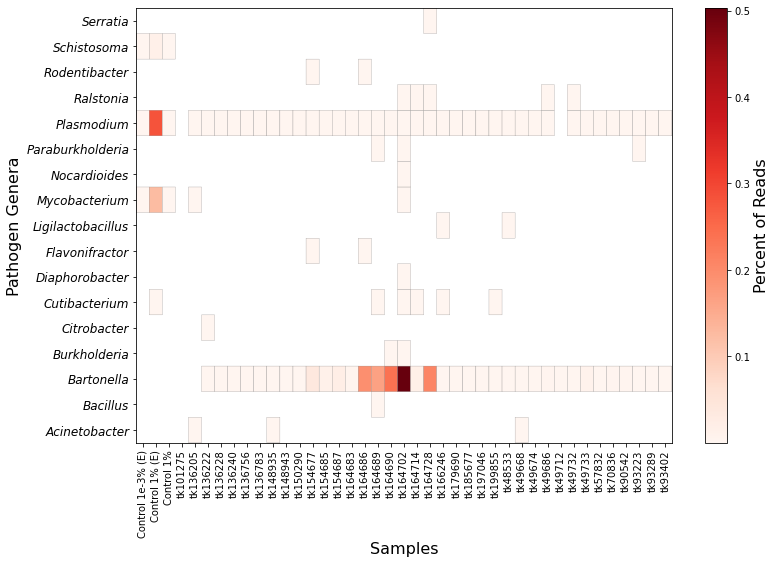

In [883]:
class_agg=df.loc[df['genus'].isin(target_genera)].groupby(['sample_id','genus']).agg({'taxon_num_frags': 'sum'}).reset_index()

class_piv=class_agg.pivot(index="sample_id", columns="genus", values="taxon_num_frags").fillna(0)
#class_piv = pd.concat([tk101275_entry_df.transpose(),class_piv.loc[:]])

#convert to percentages
class_piv = class_piv.div(taxon_num_frags, axis=0)

# #drop controls
# #class_piv=class_piv.drop(labels=["unclassified"], axis=1)
class_piv.replace(0, np.nan, inplace=True)
# class_piv=class_piv[3:]

class_piv= class_piv.rename(index={"c1e_3p_control_enrich": "Control 1e-3% (E)", 
                        "c1p_control_enrich":    "Control 1% (E)", 
                        "c1p_control_no_enrich": "Control 1%"})


plt.figure(figsize=(12,8))
plt.pcolor(class_piv.T, cmap="Reds", edgecolor='grey')
plt.colorbar().set_label('Percent of Reads', size=16)
plt.yticks(np.arange(0.5, len(class_piv.columns), 1), class_piv.columns, style="italic", size=12)
plt.xticks(np.arange(0.5, len(class_piv.index), 1), class_piv.index, rotation='vertical')
plt.ylabel('Pathogen Genera', size = 16)
plt.xlabel('Samples', size = 16)
plt.savefig('heatmap_genus.svg', facecolor="white")
plt.show()

In [889]:
class_piv.sum(axis=1)*100

sample_id
Control 1e-3% (E)     0.140875
Control 1% (E)       42.088594
Control 1%            0.031135
tk101275              0.000000
tk136205              0.072152
tk136222              0.037130
tk136228              0.011079
tk136240              0.001115
tk136756              0.000172
tk136783              0.007778
tk148935              0.000689
tk148943              0.000076
tk150290              0.001812
tk154677              3.903067
tk154685              1.306645
tk154687              2.354957
tk164683              0.476929
tk164686             19.340993
tk164689             16.650721
tk164690             23.962430
tk164702             50.454413
tk164714              1.687191
tk164728             21.002662
tk166246              0.065239
tk179690              0.118191
tk185677              0.001268
tk197046              0.063819
tk199855              0.002392
tk48533               0.001772
tk49668               0.013573
tk49674               0.000990
tk49686               0.26892

In [849]:
df["sample_id"].unique()

array(['tk136240', 'tk49712', 'tk199855', 'tk179690', 'tk164702',
       'tk164686', 'tk136783', 'tk136205', 'tk164714', 'tk166246',
       'tk197046', 'tk164683', 'tk90542', 'tk154677',
       'c1e_3p_control_enrich', 'tk49732', 'tk49733', 'tk136756',
       'tk101275', 'c1p_control_no_enrich', 'tk154685', 'tk57832',
       'tk164728', 'tk154687', 'tk48533', 'tk49668', 'tk49674',
       'tk164689', 'tk93402', 'tk136228', 'tk93289', 'tk150290',
       'tk49686', 'tk148935', 'tk93223', 'c1p_control_enrich', 'tk185677',
       'tk70836', 'tk148943', 'tk164690', 'tk136222'], dtype=object)

In [853]:
df.loc[((df["sample_id"] == "tk164702") & (df["genus"] == "Mycobacterium"))]

# & (df["genus"] == "Mycobacterium"))]

,root_perc_frags,root_num_frags,taxon_num_frags,rank,ncbi_taxa_id,sci_name,library_id,superkingdom,kingdom,phylum,class,order,family,genus,species,sample_id
834,0.0,1,1,G,1763,Mycobacterium,tk164702,Bacteria,NaN,Actinobacteria,Actinomycetia,Corynebacteriales,Mycobacteriaceae,Mycobacterium,NaN,tk164702


In [836]:
class_piv[["Schistosoma", "Mycobacterium", "Plasmodium"]][0:3].sum(axis=1)*100

sample_id
Control 1e-3% (E)     0.140875
Control 1% (E)       42.087841
Control 1%            0.031135
dtype: float64

In [843]:
class_piv[["Schistosoma", "Mycobacterium", "Plasmodium"]][0:3]*100

genus,Schistosoma,Mycobacterium,Plasmodium
sample_id,,,
Control 1e-3% (E),0.000589,0.030804,0.109482
Control 1% (E),1.475397,12.469477,28.142967
Control 1%,0.003992,0.004790,0.022353


In [856]:
28.142967/0.022353

1259.0241578311634

In [857]:
12.469477/0.004790

2603.231106471816

In [858]:
1.475397/0.003992

369.58842685370746

In [859]:
taxon_num_frags

sample_id
c1e_3p_control_enrich      509672
c1p_control_enrich         398469
c1p_control_no_enrich      375786
tk101275                   322934
tk136205                  2771913
tk136222                  9081704
tk136228                  5623233
tk136240                  4842825
tk136756                  4061262
tk136783                 11763488
tk148935                  5367666
tk148943                 13236745
tk150290                  4138305
tk154677                  5610408
tk154685                  8333634
tk154687                  3159336
tk164683                  6656966
tk164686                 13816778
tk164689                 19168599
tk164690                  7896862
tk164702                 19097828
tk164714                  7286254
tk164728                  9331284
tk166246                  5165624
tk179690                 12882533
tk185677                  8593367
tk197046                  7239258
tk199855                  6353963
tk48533                   9930372
tk49

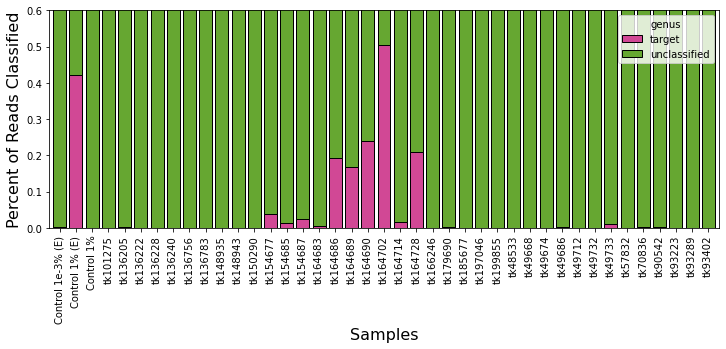

In [827]:
genus_agg=df.groupby(['sample_id','genus']).agg({'taxon_num_frags': 'sum'}).reset_index()

genus_piv=genus_agg.pivot(index="sample_id", columns="genus", values="taxon_num_frags").fillna(0)

#convert to percentages
genus_piv = genus_piv.div(taxon_num_frags, axis=0)

genus_piv['target'] = genus_piv.drop('unclassified', axis=1).sum(axis=1)

c_vs_u = genus_piv[['target', 'unclassified']]

c_vs_u= c_vs_u.rename(index={"c1e_3p_control_enrich": "Control 1e-3% (E)", 
                        "c1p_control_enrich":    "Control 1% (E)", 
                        "c1p_control_no_enrich": "Control 1%"})

colors = plt.cm.PiYG(np.linspace(0.15, 0.85, 2))

fig=c_vs_u.plot(kind='bar', 
                stacked=True, 
                figsize=(12,4), 
                width=0.8, 
                ec="black", 
                color=colors,
                ylim=[0, 0.6])
fig.set_ylabel('Percent of Reads Classified',fontdict={'fontsize':16})
fig.set_xlabel('Samples',fontdict={'fontsize':16})

fig.figure.savefig('target_vs_nontarget.svg')
fig.figure.savefig('target_vs_nontarget.png')

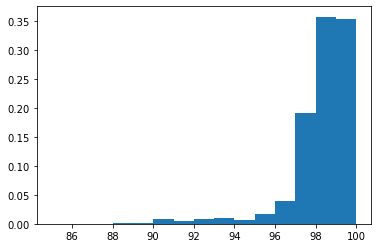

In [565]:
blast_df = pd.read_csv("/master/nplatt/pathogen_probes/results/seq_analyses/probe_div/best_hits.tab", sep="\t", header=None)
blast_df.columns=["qseqid", "sseqid", "pident", "length", "mismatch", "gapopen", "qstart", "qend", "sstart", "send", "evalue", "bitscore"]

x=blast_df.loc[blast_df["length"]>60]["pident"]
plt.hist(x, bins=15, density=True)4702
plt.show()

In [569]:
bb_df = pd.read_csv("/master/nplatt/pathogen_probes/results/seq_analyses/probe_div/test.tsv", sep="\t", header=None)
bb_df.columns=["read_id", "probe_id", "length", "id"]
bb_df

,read_id,probe_id,length,id
0,MG01HX07:862:HHNMHCCX2:7:1101:4340:3700 1:N:0:...,"uce-187_p17 |species=""Bartonella elizabethae"",...","75,75",100.00
1,MG01HX07:862:HHNMHCCX2:7:1101:8684:3700 1:N:0:...,"uce-174_p18 |species=""Bartonella elizabethae"",...","150,80",97.84
2,MG01HX07:862:HHNMHCCX2:7:1101:19624:3700 1:N:0...,"uce-1938_p30 |species=""Bartonella mastomydis"",...","150,80",97.84
3,MG01HX07:862:HHNMHCCX2:7:1101:4391:3717 1:N:0:...,"uce-188_p30 |species=""Bartonella mastomydis"",a...","97,80",100.00
4,MG01HX07:862:HHNMHCCX2:7:1101:7496:3717 1:N:0:...,"uce-190_p18 |species=""Bartonella elizabethae"",...","151,80",98.75
...,...,...,...,...
1931085,MG01HX07:862:HHNMHCCX2:7:2224:11830:73000 1:N:...,"uce-169_p16 |species=""Bartonella elizabethae"",...","127,80",100.00
1931086,MG01HX07:862:HHNMHCCX2:7:2224:17858:73000 1:N:...,"uce-173_p27 |species=""Bartonella massiliensis""...","86,80",97.50
1931087,MG01HX07:862:HHNMHCCX2:7:2224:22567:73000 1:N:...,"uce-1486_p18 |species=""Bartonella elizabethae""...","133,80",98.75
1931088,MG01HX07:862:HHNMHCCX2:7:2224:25347:73000 1:N:...,"uce-148_p29 |species=""Bartonella mastomydis"",a...","79,79",100.00


In [592]:
x=bb_df["length"].str.split(',', expand=True)
x=x[1].astype(int)
x

0          75
1          80
2          80
3          80
4          80
           ..
1931085    80
1931086    80
1931087    80
1931088    79
1931089    80
Name: 1, Length: 1931090, dtype: int64

In [594]:
pids=bb_df.loc[x>40]["id"]

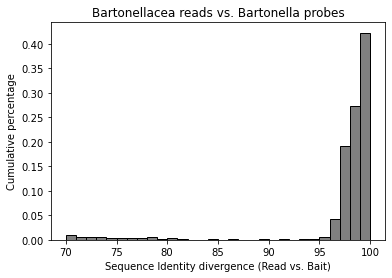

In [597]:
plt.hist(pids, bins=30, density=True, edgecolor='black', color="grey")
plt.xlabel("Sequence Identity divergence (Read vs. Bait)")
plt.ylabel("Cumulative percentage")
plt.title("Bartonellacea reads vs. Bartonella probes")
plt.savefig('bart_probes_vs_reads.svg')
plt.savefig('bart_probes_vs_reads.png', dpi=300, transparent=False)
plt.show()


In [575]:
x[1]

0          75
1          80
2          80
3          80
4          80
           ..
1931085    80
1931086    80
1931087    80
1931088    79
1931089    80
Name: 1, Length: 1931090, dtype: object

In [626]:
bb_df = pd.read_csv("/master/nplatt/pathogen_probes/results/seq_analyses/probe_div/non_bart_all_R1_mapped.tsv", sep="\t", header=None)
bb_df.columns=["read_id", "probe_id", "length", "id"]
bb_df

,read_id,probe_id,length,id
0,MG01HX07:862:HHNMHCCX2:7:2222:3427:24655 1:N:0...,"uce-812_p11 |species=""Listeria floridensis"",ac...","92,80",77.69
1,MG01HX07:862:HHNMHCCX2:7:2222:3427:24655 1:N:0...,"uce-812_p19 |species=""Listeria innocua"",access...","92,80",76.61
2,MG01HX07:862:HHNMHCCX2:7:2222:29102:71805 1:N:...,"uce-812_p3 |species=""Listeria booriae"",accessi...","76,76",73.08
3,MG01HX07:862:HHNMHCCX2:7:2222:29102:71805 1:N:...,"uce-812_p13 |species=""Listeria goaensis"",acces...","76,76",72.12
4,MG01HX07:862:HHNMHCCX2:7:2222:29102:71805 1:N:...,"uce-812_p11 |species=""Listeria floridensis"",ac...","103,80",72.12
...,...,...,...,...
67590,FS10000716:9:BPC29522-1832:1:1116:15430:2270 1...,"uce-1378_p34 |species=""Schistosoma mansoni"",ac...","151,69",100.00
67591,FS10000716:9:BPC29522-1832:1:1116:4920:2320 1:...,"uce-1393_p19 |species=""Schistosoma bovis"",acce...","93,80",96.25
67592,FS10000716:9:BPC29522-1832:1:1116:13950:2350 1...,"uce-1397_p20 |species=""Schistosoma bovis"",acce...","58,50",94.00
67593,FS10000716:9:BPC29522-1832:1:1116:13290:2370 1...,"uce-1397_p21 |species=""Schistosoma curassoni"",...","86,80",100.00


In [627]:
x=bb_df["length"].str.split(',', expand=True)
x=x[1].astype(int)
x

0        80
1        80
2        76
3        76
4        80
         ..
67590    69
67591    80
67592    50
67593    80
67594    80
Name: 1, Length: 67595, dtype: int64

In [628]:
bb_df=bb_df.loc[x>60]

In [629]:
bb_df

,read_id,probe_id,length,id
0,MG01HX07:862:HHNMHCCX2:7:2222:3427:24655 1:N:0...,"uce-812_p11 |species=""Listeria floridensis"",ac...","92,80",77.69
1,MG01HX07:862:HHNMHCCX2:7:2222:3427:24655 1:N:0...,"uce-812_p19 |species=""Listeria innocua"",access...","92,80",76.61
2,MG01HX07:862:HHNMHCCX2:7:2222:29102:71805 1:N:...,"uce-812_p3 |species=""Listeria booriae"",accessi...","76,76",73.08
3,MG01HX07:862:HHNMHCCX2:7:2222:29102:71805 1:N:...,"uce-812_p13 |species=""Listeria goaensis"",acces...","76,76",72.12
4,MG01HX07:862:HHNMHCCX2:7:2222:29102:71805 1:N:...,"uce-812_p11 |species=""Listeria floridensis"",ac...","103,80",72.12
...,...,...,...,...
67589,FS10000716:9:BPC29522-1832:1:1116:15830:2240 1...,"uce-1384_p20 |species=""Schistosoma bovis"",acce...","134,80",97.50
67590,FS10000716:9:BPC29522-1832:1:1116:15430:2270 1...,"uce-1378_p34 |species=""Schistosoma mansoni"",ac...","151,69",100.00
67591,FS10000716:9:BPC29522-1832:1:1116:4920:2320 1:...,"uce-1393_p19 |species=""Schistosoma bovis"",acce...","93,80",96.25
67593,FS10000716:9:BPC29522-1832:1:1116:13290:2370 1...,"uce-1397_p21 |species=""Schistosoma curassoni"",...","86,80",100.00


In [630]:
bb_df=bb_df.sort_values(by=['id'], ascending=False)

In [631]:
bb_df

,read_id,probe_id,length,id
33980,FS10000716:9:BPC29522-1832:1:1104:6910:2050 1:...,"uce-81_p91 |species=""Plasmodium falciparum"",ac...","87,80",100.00
30766,FS10000716:9:BPC29522-1832:1:1102:14410:2790 1...,"uce-74_p75 |species=""Plasmodium reichenowi"",ac...","73,73",100.00
30770,FS10000716:9:BPC29522-1832:1:1102:1330:2800 1:...,"uce-81_p92 |species=""Plasmodium falciparum"",ac...","105,66",100.00
30771,FS10000716:9:BPC29522-1832:1:1102:2320:2800 1:...,"uce-65_p74 |species=""Plasmodium reichenowi"",ac...","112,80",100.00
30772,FS10000716:9:BPC29522-1832:1:1102:3070:2800 1:...,"uce-74_p75 |species=""Plasmodium reichenowi"",ac...","72,72",100.00
...,...,...,...,...
32702,FS10000716:9:BPC29522-1832:1:1103:7270:2620 1:...,"uce-58_p77 |species=""Plasmodium sp"",accession=...","126,80",70.04
18489,FS10000716:9:BPC29522-1832:1:1112:10610:1310 1...,"uce-865_p25 |species=""Mycobacterium canettii"",...","107,80",70.04
9387,FS10000716:9:BPC29522-1832:1:1101:16260:1340 1...,"uce-83400_p105 |species=""Mycobacterium orygis""...","130,78",70.00
9386,FS10000716:9:BPC29522-1832:1:1101:16260:1340 1...,"uce-83400_p26 |species=""Mycobacterium canettii...","78,78",70.00


In [632]:
ubb_df=bb_df.groupby('read_id', as_index=False).first()

In [633]:
bb_df["read_id"].nunique()

65850

In [634]:
ubb_df

,read_id,probe_id,length,id
0,FS10000716:9:BPC29522-1832:1:1101:10000:2970 1...,"uce-95_p51 |species=""Plasmodium gaboni"",access...","90,80",96.25
1,FS10000716:9:BPC29522-1832:1:1101:10000:3470 1...,"uce-67_p79 |species=""Plasmodium vivax"",accessi...","122,80",100.00
2,FS10000716:9:BPC29522-1832:1:1101:1000:1090 1:...,"uce-67_p66 |species=""Plasmodium knowlesi"",acce...","147,78",98.72
3,FS10000716:9:BPC29522-1832:1:1101:1000:3640 1:...,"uce-80_p93 |species=""Plasmodium falciparum"",ac...","81,80",99.07
4,FS10000716:9:BPC29522-1832:1:1101:10010:1210 1...,"uce-57_p96 |species=""Plasmodium falciparum"",ac...","106,74",100.00
...,...,...,...,...
65845,MG01HX07:862:HHNMHCCX2:7:2224:8430:72912 1:N:0...,"uce-292_p5 |species=""Burkholderia anthina"",acc...","103,79",100.00
65846,MG01HX07:862:HHNMHCCX2:7:2224:8724:37981 1:N:0...,"uce-292_p5 |species=""Burkholderia anthina"",acc...","104,79",100.00
65847,MG01HX07:862:HHNMHCCX2:7:2224:8806:22511 1:N:0...,"uce-1218_p3 |species=""Pasteurella caecimuris"",...","79,79",100.00
65848,MG01HX07:862:HHNMHCCX2:7:2224:9425:60255 1:N:0...,"uce-292_p60 |species=""Burkholderia singularis""...","143,80",97.50


In [635]:
upids=ubb_df["id"]

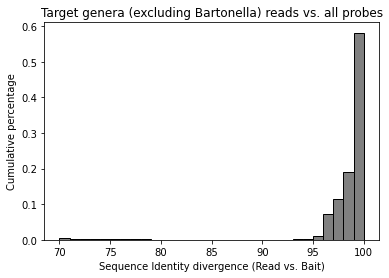

In [636]:
plt.hist(upids, bins=30, density=True, edgecolor='black', color="grey")
plt.xlabel("Sequence Identity divergence (Read vs. Bait)")
plt.ylabel("Cumulative percentage")
plt.title("Target genera (excluding Bartonella) reads vs. all probes")
plt.savefig('probes_vs_reads.svg')
plt.savefig('probes_vs_reads.png', dpi=300, transparent=False)
plt.show()

In [879]:
len(pids[pids>=95])/len(pids)

0.9371052878530926

In [2]:
import os
from Bio import SeqIO

proj_dir="/master/nplatt/pathogen_probes/"
os.chdir("{}/results/seq_analyses".format(proj_dir))

In [3]:
os.chdir("/master/nplatt/pathogen_probes/results/seq_analyses/03_plasmodium_phylogeny/02_spades_assemblies/contigs")

In [4]:
import os

in_file    =sys.argv[1]
cov_cutoff =sys.argv[2]
len_cutoff =sys.argv[3]

out_file ="filtered/{}".format(infile)

if not os.path.exists('filtered'):
   os.makedirs('filtered')

fasta_sequences = SeqIO.parse(open(in_file),'fasta')
filtered_fasta_sequences = []

for fasta in fasta_sequences:
    name, sequence = fasta.id, str(fasta.seq)
    cov=float(name.split("_")[-1])
    seq_len = int(name.split("_")[3])
    if ( (cov > cov_cutoff) and (seq_len > len_cutoff) ):
        filtered_fasta_sequences.append(fasta)

SeqIO.write(filtered_fasta_sequences, out_file, "fasta")

7

In [6]:
len(filtered_fasta_sequences)

7